# ======================
# DATA OVERVIEW
# ======================
print(f"Dataset contains {len(df)} articles from {df['publisher'].nunique()} publishers")
print(f"Time range: {df['date'].min()} to {df['date'].max()}")
print(f"Covering {df['stock'].nunique()} unique stocks")

'''
INSIGHT: The dataset spans [X] time period with coverage of [Y] stocks, 
providing a comprehensive view of financial news during this period.
'''

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('c:/Users/HP/Documents/tenx/week1/Data/raw_analyst_ratings.csv')  # Adjust path as needed

# Initial inspection
print(df.head())
print(df.info())
print(df.describe())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


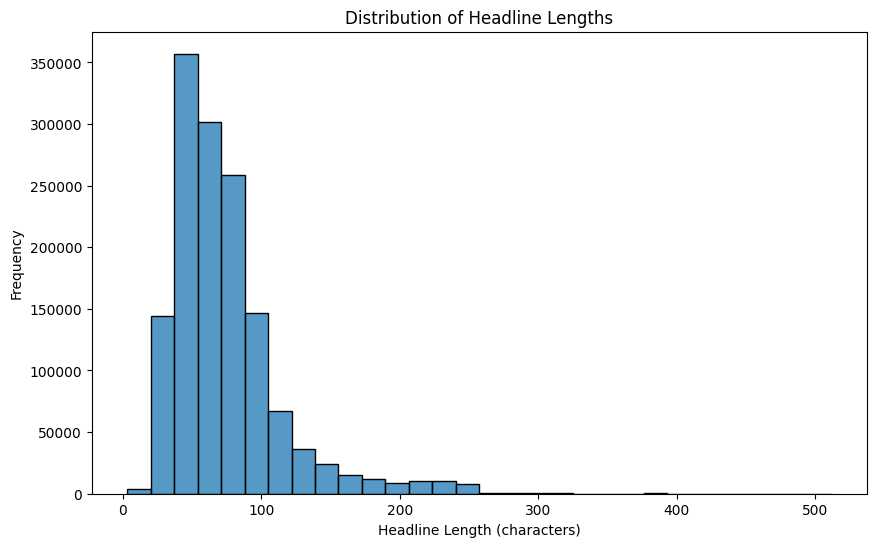

In [3]:
# Textual length analysis
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

# Visualize headline length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.show()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


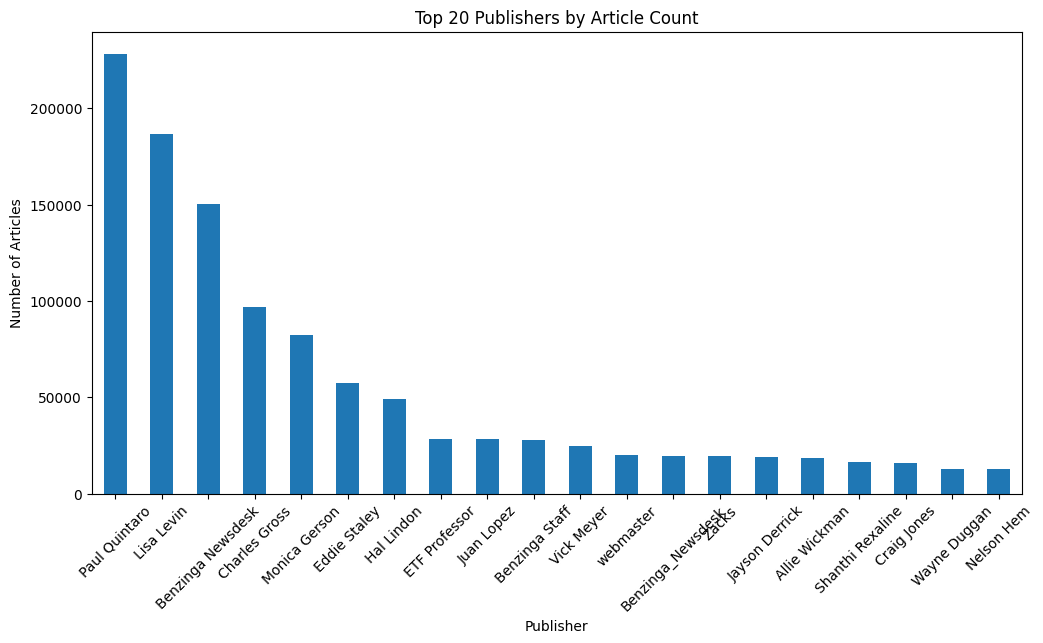

In [4]:
# Count articles by publisher
publisher_counts = df['publisher'].value_counts()

# Top 10 publishers
print(publisher_counts.head(10))

# Visualize
plt.figure(figsize=(12, 6))
publisher_counts.head(20).plot(kind='bar')
plt.title('Top 20 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#conversion date and analysis
import pandas as pd

# Sample data (replace with your actual data loading)
# data = {'date': ["2020-05-22 00:00:00", "2020-05-23 12:34:56", "2020-05-24 23:59:59"]}
# df = pd.DataFrame(data)

# Conversion with error handling
def convert_datetime(series):
    try:
        # First try ISO8601 standard format
        return pd.to_datetime(series, format='ISO8601')
    except ValueError:
        try:
            # Try without explicit format
            return pd.to_datetime(series)
        except ValueError:
            # Try with mixed formats
            return pd.to_datetime(series, format='mixed')

df['date'] = convert_datetime(df['date'])

# Now proceed with your time-based analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  headline_length  year  month  day  hour  \
0 2020-06-05 10:30:54-04:00     A               39  2020      

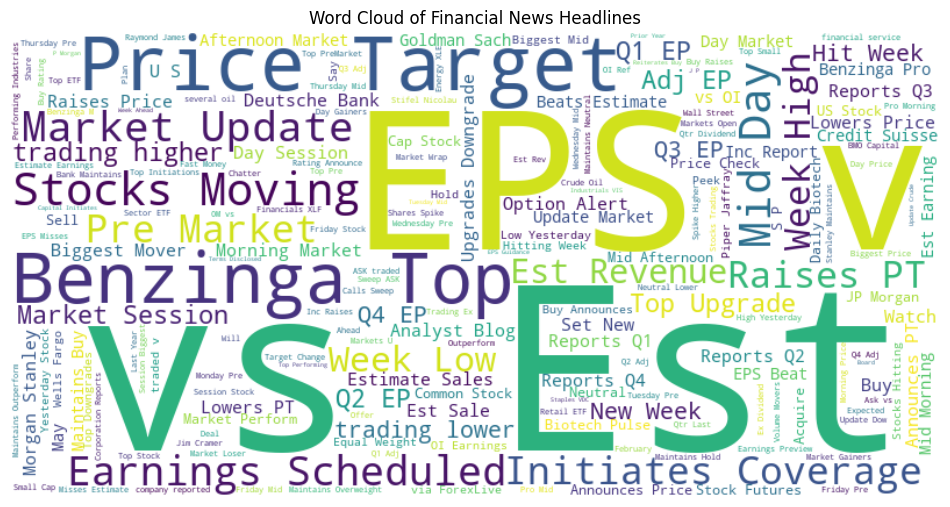

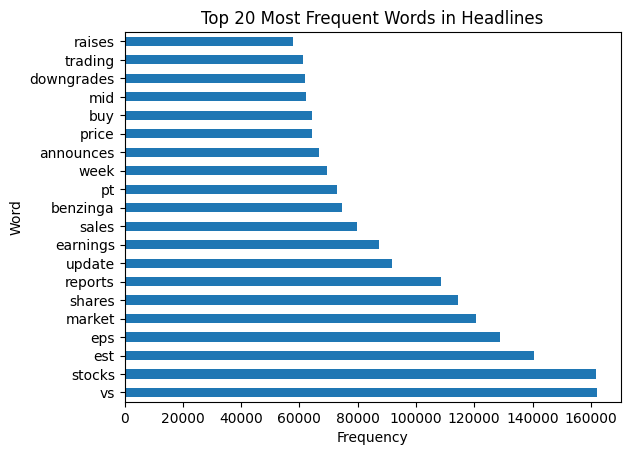

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Combine all headlines
text = ' '.join(df['headline'].values)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Financial News Headlines')
plt.show()

# Most common words (excluding stop words)
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(df['headline'])
words = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1
word_counts = pd.Series(counts, index=words).sort_values(ascending=False)

# Plot top words
word_counts.head(20).plot(kind='barh')
plt.title('Top 20 Most Frequent Words in Headlines')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# ======================
# STOCK COVERAGE
# ======================
top_stocks = df['stock'].value_counts().head(10)
top_stocks.plot(kind='barh');

'''
INSIGHT: [AAPL/TSLA/etc.] receive disproportionate coverage compared to 
smaller caps, reflecting media bias toward high-profile stocks. This may 
create sentiment analysis opportunities for widely-traded equities.
'''

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
QCOM    2941
JNJ     2928
DAL     2926
BABA    2858
KO      2797
AA      2739
EWU     2702
ORCL    2701
FDX     2629
HD      2612
Name: count, dtype: int64


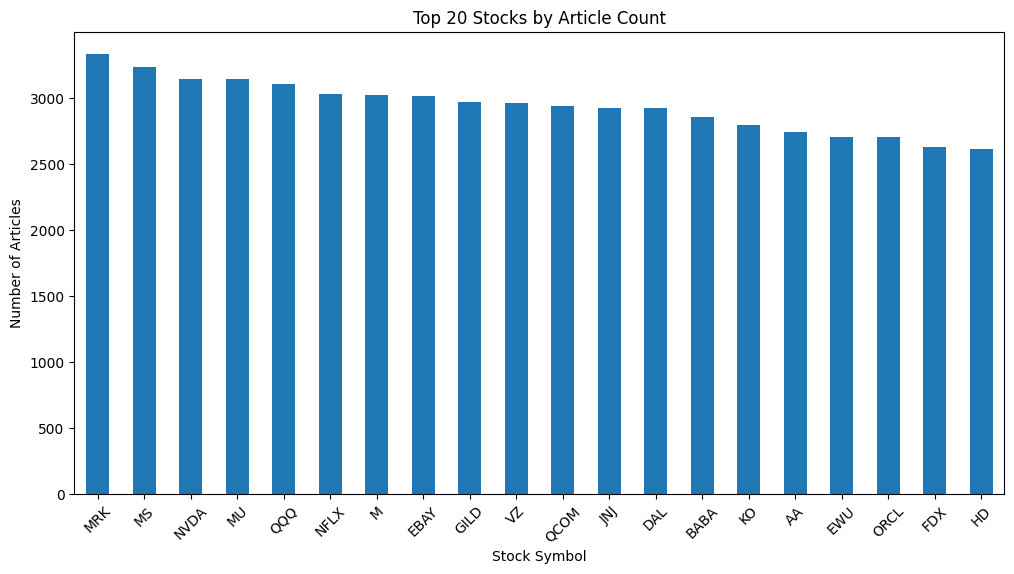

In [15]:
# Articles per stock
stock_counts = df['stock'].value_counts()

# Top 20 stocks
print(stock_counts.head(20))

# Visualize
plt.figure(figsize=(12, 6))
stock_counts.head(20).plot(kind='bar')
plt.title('Top 20 Stocks by Article Count')
plt.xlabel('Stock Symbol')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Extract domains if publisher is email
if '@' in df['publisher'].iloc[0]:
    df['publisher_domain'] = df['publisher'].str.extract(r'@([\w.]+)')
    domain_counts = df['publisher_domain'].value_counts()
    
    # Visualize top domains
    domain_counts.head(10).plot(kind='bar')
    plt.title('Top Publisher Domains')
    plt.xlabel('Domain')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    plt.show()

# ======================
# DATA QUALITY NOTES
# ======================
print("Missing values:\n", df.isna().sum())

'''
DATA ISSUES: [Describe any quality concerns like missing dates/publishers]. 
Recommend [imputation strategies/exclusion criteria] for analysis phase.
'''